In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import collections

from graph_factory import GraphFactory
from algorithmics import GraphAlgorithms

In [13]:
VERTICES = 8
## Ребра для невзвешенного графа (u, v, weight=1.0)
# (исходная вершина - 1, целевая вершина - 1, вес)
unweighted_edges = [
    (0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0),
    (1, 4, 1.0), (2, 4, 1.0), (3, 5, 1.0),
    (4, 5, 1.0), (4, 6, 1.0), (5, 7, 1.0)
]

In [14]:
# Ребра для взвешенного графа с произвольными весами
weighted_edges = [
    (0, 1, 2.5), (0, 2, 1.0), (0, 3, 3.0),
    (1, 4, 1.5), (2, 4, 4.0), (3, 5, 2.0),
    (4, 5, 1.0), (4, 6, 5.0), (5, 7, 1.0)
]

### Task 1 - Build Four Graph Variants
Using **the same base graph structure as in your written homework (the manual DFS/DFS exercise)**, construct:

- Weighted Directed graph
- Weighted Undirected graph
- Unweighted Undirected graph
- Unweighted Directed graph


In [19]:
# Взвешенный направленный граф
wd_graph = GraphFactory.from_edges(VERTICES, weighted_edges, directed=True)

# Взвешенный ненаправленный граф
wu_graph = GraphFactory.from_edges(VERTICES, weighted_edges, directed=False)

# Невзвешенный ненаправленный граф
uu_graph = GraphFactory.from_edges(VERTICES, unweighted_edges, directed=False)

# Невзвешенный направленный граф
ud_graph = GraphFactory.from_edges(VERTICES, unweighted_edges, directed=True)

### Task 2 - Apply Algorithms (BFS, DFS, Components, Stats)
After you implement the TODO's in algorithmics.py and the required representations in graph_abc.py:

For unweighted directed and undirected graphs:
1. Run BFS from a chosen start vertex (note your choice).
2. Run DFS from the same start vertex.
3. Compute connected components:
    - For undirected graphs: standard components.
    - For directed graphs: weakly connected components (ignore directions).

4. Compute component statistics: for each component, report
    - vertices (sorted),
    - node_count,
    - edge_count (count undirected edges once; count directed edges with both endpoints in the component),
    - smallest_vertex

In [26]:
start_vertex = 0  # Начнем обход с вершины 0 (соответствует вершине 1)
print(f"Стартовая вершина для BFS и DFS: {start_vertex + 1}\n")


print("Анализ невзвешенного ненаправленного графа:")
# BFS
bfs_uu_order = GraphAlgorithms.bfs(uu_graph, start_vertex)
print(f"Порядок обхода BFS: {[v + 1 for v in bfs_uu_order]}")

# DFS
dfs_uu_order = GraphAlgorithms.dfs(uu_graph, start_vertex)
print(f"Порядок обхода DFS: {[v + 1 for v in dfs_uu_order]}")

# Компоненты и их статистика
stats_uu = GraphAlgorithms.components_with_stats(uu_graph)
print("Статистика по компонентам связности:")
for i, stat in enumerate(stats_uu):
    print(f"Компонента {i+1}:")
    print(f"Вершины: {[v + 1 for v in stat['vertices']]}")
    print(f"Количество вершин: {stat['node_count']}")
    print(f"Количество рёбер: {stat['edge_count']}")
    print(f"Наименьшая вершина: {stat['smallest_vertex'] + 1}")



print("\nАнализ невзвешенного направленного графа:")
# BFS
bfs_ud_order = GraphAlgorithms.bfs(ud_graph, start_vertex)
print(f"Порядок обхода BFS: {[v + 1 for v in bfs_ud_order]}")

# DFS
dfs_ud_order = GraphAlgorithms.dfs(ud_graph, start_vertex)
print(f"Порядок обхода DFS: {[v + 1 for v in dfs_ud_order]}")

# Слабо связные компоненты и их статистика
stats_ud = GraphAlgorithms.components_with_stats(ud_graph)
print("Статистика по слабо связным компонентам:")
for i, stat in enumerate(stats_ud):
    print(f"Компонента {i+1}:")
    print(f"Вершины: {[v + 1 for v in stat['vertices']]}")
    print(f"Количество вершин: {stat['node_count']}")
    print(f"Количество рёбер: {stat['edge_count']}")
    print(f"Наименьшая вершина: {stat['smallest_vertex'] + 1}")

Стартовая вершина для BFS и DFS: 1

Анализ невзвешенного ненаправленного графа:
Порядок обхода BFS: [1, 2, 3, 4, 5, 6, 7, 8]
Порядок обхода DFS: [1, 2, 5, 3, 6, 4, 8, 7]
Статистика по компонентам связности:
Компонента 1:
Вершины: [1, 2, 3, 4, 5, 6, 7, 8]
Количество вершин: 8
Количество рёбер: 9
Наименьшая вершина: 1

Анализ невзвешенного направленного графа:
Порядок обхода BFS: [1, 2, 3, 4, 5, 6, 7, 8]
Порядок обхода DFS: [1, 2, 5, 6, 8, 7, 3, 4]
Статистика по слабо связным компонентам:
Компонента 1:
Вершины: [1, 2, 3, 4, 5, 6, 7, 8]
Количество вершин: 8
Количество рёбер: 9
Наименьшая вершина: 1


### Task 3 - Visualize One Graph with NetworkX
Pick any one of the four graphs (the most interesting one) and draw it using NetworkX.

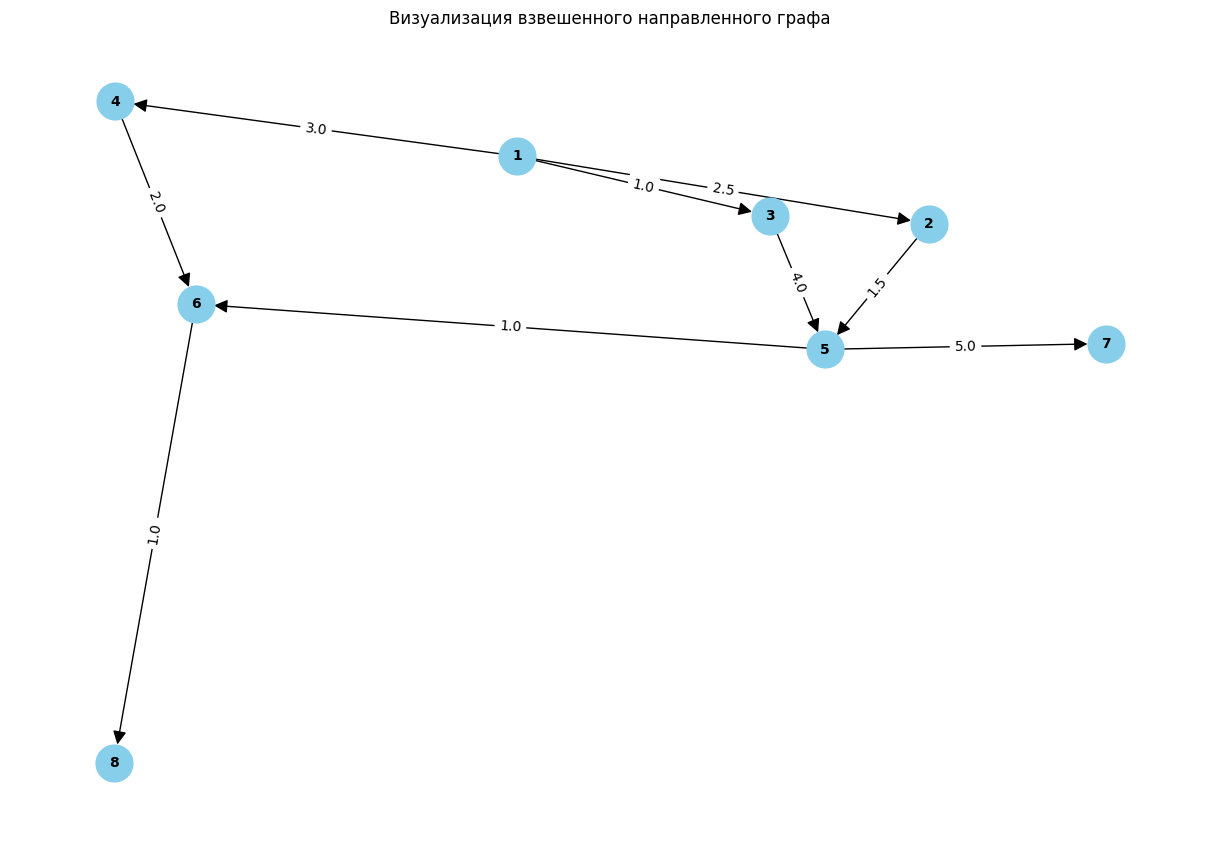

In [29]:
G = nx.DiGraph()

# Добавляем ребра из нашего графа
adj_list = wd_graph.get_adjacency_list()
for u, neighbors in adj_list.items():
    for v, weight in neighbors:
        G.add_edge(u + 1, v + 1, weight=weight)

# Настраиваем визуализацию
pos = nx.spring_layout(G, seed=42)  # для воспроизводимого расположения вершин
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(12, 8))
nx.draw(
    G, pos, with_labels=True, node_size=700, node_color='skyblue',
    font_size=10, font_weight='bold', arrowsize=20
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Визуализация взвешенного направленного графа")
plt.show()